In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
longterm_frgn = pd.read_csv('/content/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding = 'cp949')
food_waste_month = pd.read_csv('food_waste_month.csv', encoding = 'cp949')

Y 데이터 업로드 및 전처리 

In [5]:
food_waste_month

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


In [6]:
food_waste_month['base_date'] = pd.to_datetime(food_waste_month['base_date'])
food_waste_month['year'] = food_waste_month['base_date'].dt.year
food_waste_month['month'] = food_waste_month['base_date'].dt.month

In [7]:
food_waste_month = food_waste_month[['year', 'month', 'emd_nm', 'sum(em_g)']]

In [8]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,42453750
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


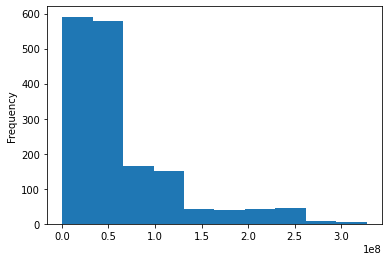

In [9]:
food_waste_month['sum(em_g)'].plot.hist()

In [10]:
food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


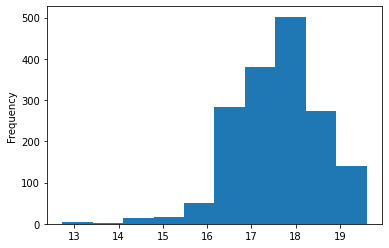

In [11]:
food_waste_month['sum(em_g)'].plot.hist()

In [12]:
scaler = StandardScaler()
food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,0.064537
1,2018,1,남원읍,-0.011915
2,2018,1,노형동,1.909326
3,2018,1,대륜동,0.308722
4,2018,1,대정읍,-0.103599
...,...,...,...,...
1661,2021,6,표선면,-0.011518
1662,2021,6,한경면,-0.483871
1663,2021,6,한림읍,0.688454
1664,2021,6,화북동,0.994181


long_term데이터 업로드 및 전처리

In [14]:
longterm_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250.0,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250.0,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250.0,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250.0,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250.0,한림읍,15.9184,0.0000,2.8758,제주


In [15]:
longterm_frgn['base_date'] = pd.to_datetime(longterm_frgn['base_date'], errors="ignore")
longterm_frgn['year'] = longterm_frgn['base_date'].dt.year
longterm_frgn['month'] = longterm_frgn['base_date'].dt.month

In [16]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm', 'time', 'nationality'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
longterm_frgn.head()

,year,month,emd_nm,time,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,건입동,1,AUS,0.0000,0.0000,5.6586
1,2018,1,건입동,1,BGD,0.0000,0.0000,6.4670
2,2018,1,건입동,1,CAN,0.0000,0.0000,13.0201
3,2018,1,건입동,1,CHN,779.6059,125.6074,608.8799
4,2018,1,건입동,1,ETC,41.9750,0.0000,19.3291


In [18]:
longterm_frgn.loc[:, ['time','resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].corr()

,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,1.000000,-0.029797,0.011820,0.013032
resd_pop_cnt,-0.029797,1.000000,0.757147,0.790820
work_pop_cnt,0.011820,0.757147,1.000000,0.752219
visit_pop_cnt,0.013032,0.790820,0.752219,1.000000


In [19]:
longterm_frgn1 = longterm_frgn.copy()
longterm_frgn2 = longterm_frgn.copy()
longterm_frgn3 = longterm_frgn.copy()

In [20]:
# 더미변수 처리

In [21]:
longterm_frgn = pd.get_dummies(longterm_frgn, columns = ['time'])
longterm_frgn = pd.get_dummies(longterm_frgn, columns = ['nationality'] )

In [22]:
longterm_frgn.head()

,year,month,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,0.0000,0.0000,6.4670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,0.0000,0.0000,13.0201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,779.6059,125.6074,608.8799,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,41.9750,0.0000,19.3291,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
longterm_frgn['1am_cnt'] = longterm_frgn['time_1'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['2am_cnt'] = longterm_frgn['time_2'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['3am_cnt'] = longterm_frgn['time_3'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['4am_cnt'] = longterm_frgn['time_4'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['5am_cnt'] = longterm_frgn['time_5'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['6am_cnt'] = longterm_frgn['time_6'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['7am_cnt'] = longterm_frgn['time_7'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['8am_cnt'] = longterm_frgn['time_8'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['9am_cnt'] = longterm_frgn['time_9'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['10am_cnt'] = longterm_frgn['time_10'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['11am_cnt'] = longterm_frgn['time_11'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['12pm_cnt'] = longterm_frgn['time_12'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['1pm_cnt'] = longterm_frgn['time_13'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['2pm_cnt'] = longterm_frgn['time_14'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['3pm_cnt'] = longterm_frgn['time_15'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['4pm_cnt'] = longterm_frgn['time_16'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['5pm_cnt'] = longterm_frgn['time_17'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['6pm_cnt'] = longterm_frgn['time_18'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['7pm_cnt'] = longterm_frgn['time_19'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['8pm_cnt'] = longterm_frgn['time_20'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['9pm_cnt'] = longterm_frgn['time_21'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['10pm_cnt'] = longterm_frgn['time_22'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['11pm_cnt'] = longterm_frgn['time_23'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['12am_cnt'] = longterm_frgn['time_24'] * longterm_frgn['resd_pop_cnt']

In [25]:
longterm_frgn['AUS_cnt'] = longterm_frgn['nationality_AUS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['BGD_cnt'] = longterm_frgn['nationality_BGD'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['CAN_cnt'] = longterm_frgn['nationality_CAN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['CHN_cnt'] = longterm_frgn['nationality_CHN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['DEU_cnt'] = longterm_frgn['nationality_DEU'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['ETC_cnt'] = longterm_frgn['nationality_ETC'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['FRA_cnt'] = longterm_frgn['nationality_FRA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['GBR_cnt'] = longterm_frgn['nationality_GBR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['IDN_cnt'] = longterm_frgn['nationality_IDN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['IND_cnt'] = longterm_frgn['nationality_IND'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['JPN_cnt'] = longterm_frgn['nationality_JPN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KAZ_cnt'] = longterm_frgn['nationality_KAZ'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KGZ_cnt'] = longterm_frgn['nationality_KGZ'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KHM_cnt'] = longterm_frgn['nationality_KHM'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['LKA_cnt'] = longterm_frgn['nationality_LKA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MGL_cnt'] = longterm_frgn['nationality_MGL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MMR_cnt'] = longterm_frgn['nationality_MMR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MYS_cnt'] = longterm_frgn['nationality_MYS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['NPL_cnt'] = longterm_frgn['nationality_NPL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['NZL_cnt'] = longterm_frgn['nationality_NZL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['PAK_cnt'] = longterm_frgn['nationality_PAK'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['PHL_cnt'] = longterm_frgn['nationality_PHL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['RUS_cnt'] = longterm_frgn['nationality_RUS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['THA_cnt'] = longterm_frgn['nationality_THA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['TWN_cnt'] = longterm_frgn['nationality_TWN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['UKR_cnt'] = longterm_frgn['nationality_UKR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['USA_cnt'] = longterm_frgn['nationality_USA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['UZB_cnt'] = longterm_frgn['nationality_UZB'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['VNM_cnt'] = longterm_frgn['nationality_VNM'] * longterm_frgn['resd_pop_cnt']


In [26]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt',
                                                                   'AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
longterm_frgn.head()

In [28]:
# 시간 더미변수 

In [29]:
longterm_frgn1 = pd.get_dummies(longterm_frgn1, columns = ['time'])

In [31]:
longterm_frgn1['1am_cnt'] = longterm_frgn1['time_1'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2am_cnt'] = longterm_frgn1['time_2'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3am_cnt'] = longterm_frgn1['time_3'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4am_cnt'] = longterm_frgn1['time_4'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5am_cnt'] = longterm_frgn1['time_5'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6am_cnt'] = longterm_frgn1['time_6'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7am_cnt'] = longterm_frgn1['time_7'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8am_cnt'] = longterm_frgn1['time_8'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9am_cnt'] = longterm_frgn1['time_9'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10am_cnt'] = longterm_frgn1['time_10'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11am_cnt'] = longterm_frgn1['time_11'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12pm_cnt'] = longterm_frgn1['time_12'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['1pm_cnt'] = longterm_frgn1['time_13'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2pm_cnt'] = longterm_frgn1['time_14'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3pm_cnt'] = longterm_frgn1['time_15'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4pm_cnt'] = longterm_frgn1['time_16'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5pm_cnt'] = longterm_frgn1['time_17'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6pm_cnt'] = longterm_frgn1['time_18'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7pm_cnt'] = longterm_frgn1['time_19'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8pm_cnt'] = longterm_frgn1['time_20'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9pm_cnt'] = longterm_frgn1['time_21'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10pm_cnt'] = longterm_frgn1['time_22'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11pm_cnt'] = longterm_frgn1['time_23'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12am_cnt'] = longterm_frgn1['time_24'] * longterm_frgn1['resd_pop_cnt']

In [32]:
longterm_frgn1

,year,month,emd_nm,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,AUS,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,2018,1,건입동,BGD,0.0000,0.0000,6.4670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,2018,1,건입동,CAN,0.0000,0.0000,13.0201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,2018,1,건입동,CHN,779.6059,125.6074,608.8799,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,779.6059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,2018,1,건입동,ETC,41.9750,0.0000,19.3291,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.9750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,2018,1,효돈동,LKA,144.9497,0.0000,27.4137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.9497
18719,2018,1,효돈동,MMR,0.0000,0.0000,46.2200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18720,2018,1,효돈동,PAK,0.0000,0.0000,4.4052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18721,2018,1,효돈동,PHL,91.2643,82.9059,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.2643


In [33]:
longterm_frgn1 = longterm_frgn1.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt','5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [34]:
longterm_frgn1.head()

,year,month,emd_nm,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,2503.6835,2506.2200,2491.4878,2502.4743,2479.6498,2366.4729,2288.3282,2231.1664,2021.4556,1907.2822,1825.8401,1592.4154,1500.7105,1479.6933,1422.5679,1376.0994,1383.4739,1400.4573,1395.6519,1488.5235,1505.8489,1542.9632,1662.5155,2295.1056
1,2018,1,구좌읍,4038.9141,4041.8539,4032.3569,4033.6133,4025.1514,3985.4565,3942.4275,3894.4659,3850.0743,3647.7598,3614.3571,3208.5204,3269.1844,3269.6104,3243.7589,3269.1773,3285.5855,3403.0775,3359.4796,3364.3600,3367.2499,3454.1915,3562.5558,3744.1847
2,2018,1,남원읍,3773.0655,3781.9816,3766.6758,3734.0774,3751.2774,3713.4607,3655.2372,3630.6731,3536.8341,3568.3133,3146.5247,3137.1898,3109.0084,3141.4533,3066.3760,3046.5861,2986.4347,3048.8951,3053.7320,3075.1286,3143.5356,3126.7047,3138.9724,3481.4318
3,2018,1,노형동,27472.0011,27762.1999,27823.2705,27916.4594,27783.9252,27625.2679,27419.6077,26794.4677,25333.5348,23040.7501,19788.2291,19042.3161,18106.9147,17762.9508,17821.0234,17567.9333,17737.7037,18070.6237,19152.1236,19696.6699,20135.0635,20640.7734,21411.9418,25308.9322
4,2018,1,대륜동,2110.0359,2105.6090,2082.4647,2092.6665,2079.3236,2079.3182,1988.7393,1918.5798,1909.4992,1798.1564,1584.6733,1507.0986,1455.5371,1466.0421,1465.6953,1401.6852,1449.3928,1438.0663,1466.7454,1521.1730,1548.3558,1534.8045,1598.6968,2001.2649


In [35]:
longterm_frgn1[['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt'
                                   , '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', '2pm_cnt', '3pm_cnt', '4pm_cnt', '5pm_cnt',
                                   '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt']].corr().head()

,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
1am_cnt,1.000000,0.999982,0.999963,0.999945,0.999940,0.999896,0.999641,0.998939,0.998078,0.997412,0.992100,0.996114,0.995715,0.995035,0.994915,0.994693,0.994628,0.994653,0.995747,0.996025,0.996192,0.996351,0.996903,0.999940
2am_cnt,0.999982,1.000000,0.999991,0.999981,0.999970,0.999930,0.999703,0.999053,0.998183,0.997405,0.992053,0.996081,0.995626,0.994977,0.994893,0.994648,0.994586,0.994613,0.995772,0.996083,0.996265,0.996420,0.996999,0.999879
3am_cnt,0.999963,0.999991,1.000000,0.999996,0.999989,0.999963,0.999771,0.999175,0.998328,0.997522,0.992238,0.996211,0.995710,0.995068,0.994980,0.994698,0.994578,0.994549,0.995701,0.996030,0.996242,0.996423,0.997036,0.999846
4am_cnt,0.999945,0.999981,0.999996,1.000000,0.999994,0.999970,0.999785,0.999207,0.998358,0.997509,0.992187,0.996187,0.995663,0.995009,0.994923,0.994624,0.994483,0.994432,0.995610,0.995956,0.996194,0.996391,0.997031,0.999815
5am_cnt,0.999940,0.999970,0.999989,0.999994,1.000000,0.999981,0.999806,0.999233,0.998392,0.997580,0.992341,0.996291,0.995774,0.995106,0.995010,0.994711,0.994543,0.994475,0.995622,0.995966,0.996212,0.996413,0.997068,0.999806


In [37]:
# longterm_frgn['resd_pop_time'] = longterm_frgn['1am_cnt'] 

In [38]:
# 국적 더미변수 

In [39]:
longterm_frgn2 = pd.get_dummies(longterm_frgn2, columns = ['nationality'])

In [40]:
longterm_frgn2.head()

,year,month,emd_nm,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,1,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,1,0.0000,0.0000,6.4670,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,1,0.0000,0.0000,13.0201,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,1,779.6059,125.6074,608.8799,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,1,41.9750,0.0000,19.3291,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
longterm_frgn2['AUS_cnt'] = longterm_frgn2['nationality_AUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['BGD_cnt'] = longterm_frgn2['nationality_BGD'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CAN_cnt'] = longterm_frgn2['nationality_CAN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CHN_cnt'] = longterm_frgn2['nationality_CHN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['DEU_cnt'] = longterm_frgn2['nationality_DEU'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['ETC_cnt'] = longterm_frgn2['nationality_ETC'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['FRA_cnt'] = longterm_frgn2['nationality_FRA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['GBR_cnt'] = longterm_frgn2['nationality_GBR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IDN_cnt'] = longterm_frgn2['nationality_IDN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IND_cnt'] = longterm_frgn2['nationality_IND'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['JPN_cnt'] = longterm_frgn2['nationality_JPN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KAZ_cnt'] = longterm_frgn2['nationality_KAZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KGZ_cnt'] = longterm_frgn2['nationality_KGZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KHM_cnt'] = longterm_frgn2['nationality_KHM'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['LKA_cnt'] = longterm_frgn2['nationality_LKA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MGL_cnt'] = longterm_frgn2['nationality_MGL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MMR_cnt'] = longterm_frgn2['nationality_MMR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MYS_cnt'] = longterm_frgn2['nationality_MYS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NPL_cnt'] = longterm_frgn2['nationality_NPL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NZL_cnt'] = longterm_frgn2['nationality_NZL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PAK_cnt'] = longterm_frgn2['nationality_PAK'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PHL_cnt'] = longterm_frgn2['nationality_PHL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['RUS_cnt'] = longterm_frgn2['nationality_RUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['THA_cnt'] = longterm_frgn2['nationality_THA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['TWN_cnt'] = longterm_frgn2['nationality_TWN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UKR_cnt'] = longterm_frgn2['nationality_UKR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['USA_cnt'] = longterm_frgn2['nationality_USA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UZB_cnt'] = longterm_frgn2['nationality_UZB'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['VNM_cnt'] = longterm_frgn2['nationality_VNM'] * longterm_frgn2['resd_pop_cnt']

In [42]:
longterm_frgn2.head()

,year,month,emd_nm,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,1,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,1,건입동,1,0.0000,0.0000,6.4670,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,건입동,1,0.0000,0.0000,13.0201,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,1,건입동,1,779.6059,125.6074,608.8799,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,779.6059,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1,건입동,1,41.9750,0.0000,19.3291,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,41.975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
longterm_frgn2 = longterm_frgn2.groupby(['year', 'month', 'emd_nm'])['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [44]:
longterm_frgn2.head()

,year,month,emd_nm,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,0.0000,0.0,0.0000,11980.2044,0.0,431.1533,0.0000,0.0000,10442.2813,0.0,3471.0096,0.0,0.0,0.0000,2669.0472,0.0000,204.6289,0.0,1798.8385,0.0000,0.0,2804.4953,0.0000,0.0000,3433.3743,0.0,0.0000,0.0000,7935.0543
1,2018,1,구좌읍,0.0000,0.0,1225.3715,23965.3826,0.0,0.0000,0.0000,0.0000,6510.9948,0.0,1693.9582,0.0,0.0,8547.6720,8763.0539,0.0000,1775.1078,0.0,13009.4696,0.0000,0.0,5239.8893,1354.4893,1728.4654,0.0000,0.0,1912.9715,1365.2379,9815.3028
2,2018,1,남원읍,0.0000,0.0,0.0000,14412.5375,0.0,0.0000,0.0000,0.0000,13130.5698,0.0,0.0000,0.0,0.0,9315.9040,16376.9614,0.0000,1720.1961,0.0,10748.3915,0.0000,0.0,5547.4397,0.0000,0.0000,0.0000,0.0,232.8700,0.0000,9128.6993
3,2018,1,노형동,5375.0814,0.0,11076.2570,402848.5327,0.0,5399.9347,1180.8962,899.7647,493.4810,0.0,9324.1894,0.0,0.0,7084.6249,1737.8877,4238.2151,1146.9630,0.0,3735.4268,0.0000,0.0,2218.2837,3018.2295,3000.1518,10609.3123,0.0,14491.1780,816.2441,52520.0295
4,2018,1,대륜동,1087.3261,0.0,1373.6779,17464.0074,0.0,2764.9895,0.0000,1174.8055,0.0000,0.0,1535.5489,0.0,0.0,2167.6311,0.0000,0.0000,0.0000,0.0,0.0000,1286.4197,0.0,1688.6593,771.4838,0.0000,3343.4799,0.0,6945.5946,0.0000,0.0000


In [45]:
longterm_frgn2[['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt']].corr()

,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
AUS_cnt,1.000000,0.399646,0.912850,0.296156,0.715574,0.714932,0.645889,0.778017,0.016665,0.499076,0.356734,0.135377,-0.125499,0.255842,0.145746,0.315307,-0.063682,0.468558,0.036683,0.790326,0.258227,0.033701,0.097616,0.389348,0.169894,0.086082,0.834621,-0.000757,0.366095
BGD_cnt,0.399646,1.000000,0.326809,0.229038,-0.032368,0.228451,-0.056413,-0.006605,-0.024375,0.846109,0.287040,0.327911,-0.057787,0.441411,0.223248,0.438365,-0.031917,0.192723,0.102501,0.129425,0.794522,0.059557,0.216882,0.314576,-0.087101,0.249292,0.051145,-0.108983,0.220780
CAN_cnt,0.912850,0.326809,1.000000,0.418750,0.592644,0.810976,0.688397,0.798603,0.123626,0.429966,0.495918,0.232443,-0.024203,0.335740,0.273872,0.427558,0.039923,0.424638,0.122391,0.783518,0.191192,0.173710,0.214887,0.445257,0.288035,0.129565,0.888243,0.146406,0.518856
CHN_cnt,0.296156,0.229038,0.418750,1.000000,0.039722,0.612508,0.259605,0.136378,0.074356,0.266009,0.736901,0.434907,0.681742,0.241008,0.155606,0.586688,0.193240,0.468477,0.179585,0.062408,0.174509,0.165703,0.863374,0.238290,0.803597,0.045262,0.256278,0.366765,0.364529
DEU_cnt,0.715574,-0.032368,0.592644,0.039722,1.000000,0.519095,0.676155,0.782119,0.009164,0.148553,0.100310,-0.047427,-0.042508,-0.089929,-0.046691,0.037968,-0.058573,0.493372,0.054457,0.739377,-0.036447,-0.008836,-0.060868,0.251310,-0.064071,-0.033828,0.789871,0.118899,0.039619
ETC_cnt,0.714932,0.228451,0.810976,0.612508,0.519095,1.000000,0.459350,0.662270,0.258965,0.221964,0.490556,0.523115,0.333731,0.442483,0.291628,0.493420,0.255064,0.717148,0.356917,0.756462,0.043447,0.368632,0.545376,0.565745,0.435851,0.197208,0.788360,0.218895,0.576145
FRA_cnt,0.645889,-0.056413,0.688397,0.259605,0.676155,0.459350,1.000000,0.562640,-0.046667,0.067028,0.544863,-0.082660,-0.074086,0.013965,-0.090246,0.222202,-0.071258,0.289527,0.052295,0.468773,-0.063523,-0.086792,0.048018,0.205906,0.156248,-0.058959,0.684163,0.376312,0.216797
GBR_cnt,0.778017,-0.006605,0.798603,0.136378,0.782119,0.662270,0.562640,1.000000,0.157910,0.271021,0.116789,0.004904,0.012021,-0.021938,0.256435,0.188563,-0.007953,0.390709,0.009310,0.876720,-0.012843,0.130353,-0.006008,0.232429,0.127922,-0.060873,0.944313,0.116299,0.249152
IDN_cnt,0.016665,-0.024375,0.123626,0.074356,0.009164,0.258965,-0.046667,0.157910,1.000000,0.008034,0.007392,0.020105,0.154901,0.299859,0.636295,0.701451,0.083934,-0.039439,0.568654,0.100441,-0.035414,0.704915,0.014938,0.656214,-0.045082,0.057831,0.229857,0.087691,0.729820
IND_cnt,0.499076,0.846109,0.429966,0.266009,0.148553,0.221964,0.067028,0.271021,0.008034,1.000000,0.257716,-0.002688,-0.013828,0.093553,0.358200,0.462238,-0.052403,0.047961,-0.076629,0.175468,0.859113,-0.009044,0.091191,0.135760,-0.002487,0.021192,0.231038,-0.056530,0.094983


In [46]:
longterm_frgn2['ETC_resd_pop_cnt'] = longterm_frgn2['AUS_cnt']+longterm_frgn2['JPN_cnt']+longterm_frgn2['KGZ_cnt']+longterm_frgn2['BGD_cnt']+longterm_frgn2['CAN_cnt']+longterm_frgn2['CHN_cnt']+longterm_frgn2['DEU_cnt']+longterm_frgn2['ETC_cnt']+longterm_frgn2['GBR_cnt']+longterm_frgn2['IDN_cnt']+longterm_frgn2['IND_cnt']+longterm_frgn2['KAZ_cnt']+longterm_frgn2['MGL_cnt']+longterm_frgn2['MYS_cnt']+longterm_frgn2['NPL_cnt']+longterm_frgn2['NZL_cnt']+longterm_frgn2['PAK_cnt']+longterm_frgn2['PHL_cnt']+longterm_frgn2['RUS_cnt']+longterm_frgn2['THA_cnt']+longterm_frgn2['TWN_cnt']+longterm_frgn2['USA_cnt']+longterm_frgn2['VNM_cnt']

In [47]:
longterm_frgn2 = longterm_frgn2.loc[:, ['year', 'month', 'emd_nm', 'FRA_cnt','KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'UZB_cnt', 'UKR_cnt', 'ETC_resd_pop_cnt']]

In [48]:
longterm_frgn2.head()

,year,month,emd_nm,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt
0,2018,1,건입동,0.0000,0.0000,2669.0472,204.6289,0.0000,0.0,42296.4110
1,2018,1,구좌읍,0.0000,8547.6720,8763.0539,1775.1078,1365.2379,0.0,66456.2950
2,2018,1,남원읍,0.0000,9315.9040,16376.9614,1720.1961,0.0000,0.0,53200.5078
3,2018,1,노형동,1180.8962,7084.6249,1737.8877,1146.9630,816.2441,0.0,529248.0676
4,2018,1,대륜동,0.0000,2167.6311,0.0000,0.0000,0.0000,0.0,39435.9926


In [49]:
longterm_frgn2['resd_pop_time'] = longterm_frgn1['1am_cnt']

In [50]:
longterm_frgn3 = longterm_frgn2.copy()

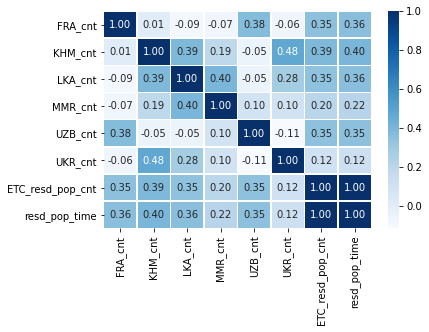

In [51]:
sns.heatmap(data=longterm_frgn3.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [52]:
longterm_frgn_file = longterm_frgn2.drop('resd_pop_time', axis = 1)

In [53]:
longterm_frgn_file.to_csv('longterm_frgn.csv', encoding = 'cp949', index = None)

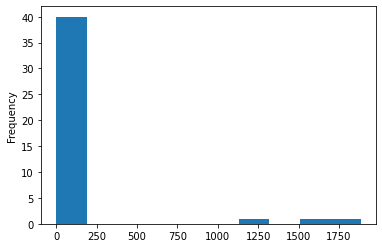

In [54]:
longterm_frgn2['FRA_cnt'].plot.hist()

In [55]:
longterm_frgn2['FRA_cnt'].describe()

count      43.000000
mean      108.883151
std       409.663357
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1883.025600
Name: FRA_cnt, dtype: float64

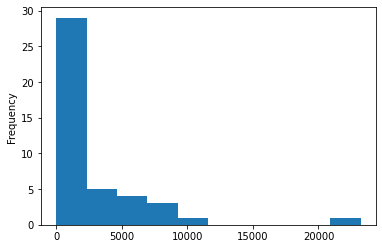

In [56]:
longterm_frgn2['KHM_cnt'].plot.hist()

In [57]:
longterm_frgn2['KHM_cnt'].describe()

count       43.000000
mean      2457.806828
std       4267.117115
min          0.000000
25%          0.000000
50%          0.000000
75%       4114.010750
max      23208.499200
Name: KHM_cnt, dtype: float64

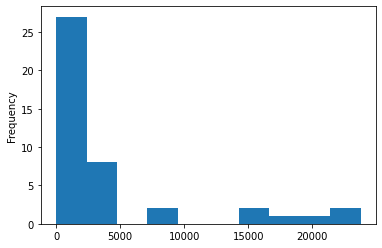

In [58]:
longterm_frgn2['LKA_cnt'].plot.hist()

In [59]:
longterm_frgn2['LKA_cnt'].describe()

count       43.000000
mean      3844.322716
std       6517.324873
min          0.000000
25%          0.000000
50%        817.636900
75%       3449.532500
max      23759.694100
Name: LKA_cnt, dtype: float64

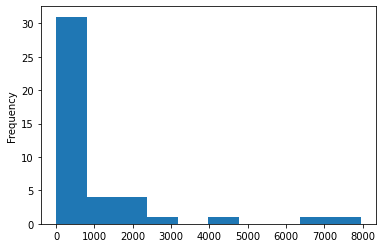

In [60]:
longterm_frgn2['MMR_cnt'].plot.hist()

In [61]:
longterm_frgn2['MMR_cnt'].describe()

count      43.000000
mean      807.827140
std      1744.754343
min         0.000000
25%         0.000000
50%         0.000000
75%      1189.409950
max      7945.103900
Name: MMR_cnt, dtype: float64

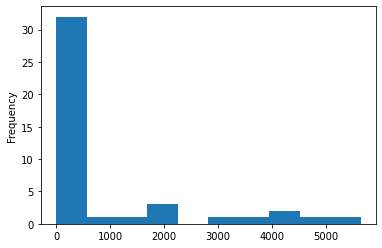

In [62]:
longterm_frgn2['UZB_cnt'].plot.hist()

In [63]:
longterm_frgn2['UZB_cnt'].describe()

count      43.000000
mean      799.527853
std      1557.124448
min         0.000000
25%         0.000000
50%         0.000000
75%       635.687600
max      5638.287100
Name: UZB_cnt, dtype: float64

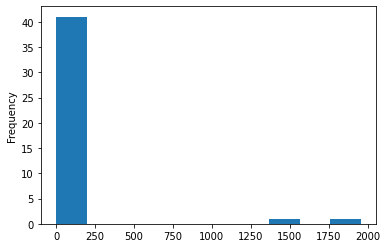

In [64]:
longterm_frgn2['UKR_cnt'].plot.hist()

In [65]:
longterm_frgn2['UKR_cnt'].describe()

count      43.000000
mean       81.236379
std       374.935121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1955.004900
Name: UKR_cnt, dtype: float64

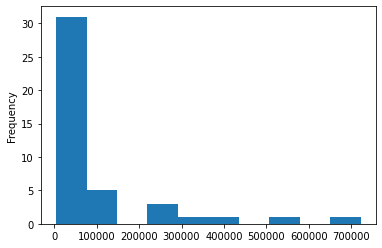

In [66]:
longterm_frgn2['ETC_resd_pop_cnt'].plot.hist()

In [67]:
longterm_frgn2['ETC_resd_pop_cnt'].describe()

count        43.000000
mean      98323.249905
std      148820.075010
min        4912.021300
25%       20476.091200
50%       40177.523500
75%       77793.140550
max      721517.606000
Name: ETC_resd_pop_cnt, dtype: float64

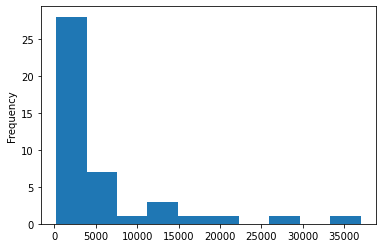

In [68]:
longterm_frgn2['resd_pop_time'].plot.hist()

In [69]:
longterm_frgn2['resd_pop_time'].describe()

count       43.000000
mean      5414.222323
std       7627.907771
min        235.399100
25%       1347.961600
50%       2442.388100
75%       4631.865150
max      36953.180500
Name: resd_pop_time, dtype: float64

In [70]:
longterm_frgn2['FRA_cnt'] = np.log(longterm_frgn2['FRA_cnt'] + 1)
longterm_frgn2['KHM_cnt'] = np.log(longterm_frgn2['KHM_cnt'] + 1)
longterm_frgn2['LKA_cnt'] = np.log(longterm_frgn2['LKA_cnt'] + 1)
longterm_frgn2['MMR_cnt'] = np.log(longterm_frgn2['MMR_cnt'] + 1)
longterm_frgn2['UZB_cnt'] = np.log(longterm_frgn2['UZB_cnt'] + 1)
longterm_frgn2['UKR_cnt'] = np.log(longterm_frgn2['UKR_cnt'] + 1)
longterm_frgn2['ETC_resd_pop_cnt'] = np.log(longterm_frgn2['ETC_resd_pop_cnt']+1)
longterm_frgn2['resd_pop_time'] = np.log(longterm_frgn2['resd_pop_time'] + 1)

In [71]:
longtermfrgn_final = longterm_frgn2.copy()

In [72]:
longtermfrgn_final = longtermfrgn_final.dropna(axis = 1).reset_index()

In [74]:
longtermfrgn_final['FRA_cnt'] = scaler.fit_transform(longterm_frgn2[['FRA_cnt']])
longtermfrgn_final['KHM_cnt'] = scaler.fit_transform(longterm_frgn2[['KHM_cnt']])
longtermfrgn_final['LKA_cnt'] = scaler.fit_transform(longterm_frgn2[['LKA_cnt']])
longtermfrgn_final['MMR_cnt'] = scaler.fit_transform(longterm_frgn2[['MMR_cnt']])
longtermfrgn_final['UZB_cnt'] = scaler.fit_transform(longterm_frgn2[['UZB_cnt']])
longtermfrgn_final['UKR_cnt'] = scaler.fit_transform(longterm_frgn2[['UKR_cnt']])
longtermfrgn_final['ETC_resd_pop_cnt'] = scaler.fit_transform(longterm_frgn2[['ETC_resd_pop_cnt']])
longtermfrgn_final['resd_pop_time'] = scaler.fit_transform(longterm_frgn2[['resd_pop_time']])

In [75]:
longtermfrgn_final

,index,year,month,emd_nm,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt,resd_pop_time
0,0,2018,1,건입동,-0.273758,-0.922567,0.814843,0.796925,-0.618332,-0.220833,-0.096647,-0.103610
1,1,2018,1,구좌읍,-0.273758,1.260386,1.095957,1.410563,1.447580,-0.220833,0.294795,0.326562
2,2,2018,1,남원읍,-0.273758,1.281135,1.243846,1.401625,-0.618332,-0.220833,0.102058,0.265311
3,3,2018,1,노형동,3.510845,1.215126,0.713412,1.286351,1.300537,-0.220833,2.092367,2.051512
4,4,2018,1,대륜동,-0.273758,0.929651,-1.051239,-0.718898,-0.618332,-0.220833,-0.157310,-0.257465
5,5,2018,1,대정읍,-0.273758,1.074149,1.310067,1.361080,-0.618332,-0.220833,1.450183,1.459365
6,6,2018,1,대천동,-0.273758,1.098992,-1.051239,-0.718898,-0.618332,-0.220833,-0.204233,-0.170500
7,7,2018,1,도두동,-0.273758,1.182705,-1.051239,-0.718898,-0.618332,-0.220833,-0.747413,-0.695930
8,8,2018,1,동홍동,-0.273758,1.148447,0.749791,-0.718898,1.523571,-0.220833,0.479713,0.530707
9,9,2018,1,봉개동,-0.273758,-0.922567,0.246827,-0.718898,-0.618332,-0.220833,-0.703363,-0.758456


In [76]:
longtermfrgn_final_merge = food_waste_month.merge(longtermfrgn_final, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [77]:
longtermfrgn_final_merge

,year,month,emd_nm,sum(em_g),index,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt,resd_pop_time
0,2018,1,건입동,0.064537,0,-0.273758,-0.922567,0.814843,0.796925,-0.618332,-0.220833,-0.096647,-0.103610
1,2018,1,남원읍,-0.011915,2,-0.273758,1.281135,1.243846,1.401625,-0.618332,-0.220833,0.102058,0.265311
2,2018,1,노형동,1.909326,3,3.510845,1.215126,0.713412,1.286351,1.300537,-0.220833,2.092367,2.051512
3,2018,1,대륜동,0.308722,4,-0.273758,0.929651,-1.051239,-0.718898,-0.618332,-0.220833,-0.157310,-0.257465
4,2018,1,대정읍,-0.103599,5,-0.273758,1.074149,1.310067,1.361080,-0.618332,-0.220833,1.450183,1.459365
5,2018,1,대천동,0.238051,6,-0.273758,1.098992,-1.051239,-0.718898,-0.618332,-0.220833,-0.204233,-0.170500
6,2018,1,도두동,-1.124307,7,-0.273758,1.182705,-1.051239,-0.718898,-0.618332,-0.220833,-0.747413,-0.695930
7,2018,1,동홍동,1.066900,8,-0.273758,1.148447,0.749791,-0.718898,1.523571,-0.220833,0.479713,0.530707
8,2018,1,봉개동,-1.487802,9,-0.273758,-0.922567,0.246827,-0.718898,-0.618332,-0.220833,-0.703363,-0.758456
9,2018,1,삼도1동,0.529026,10,-0.273758,-0.922567,-1.051239,-0.718898,1.708297,-0.220833,-0.423428,-0.330722


In [78]:
longtermfrgn_final_merge.dropna(axis = 0)

,year,month,emd_nm,sum(em_g),index,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt,resd_pop_time
0,2018,1,건입동,0.064537,0,-0.273758,-0.922567,0.814843,0.796925,-0.618332,-0.220833,-0.096647,-0.103610
1,2018,1,남원읍,-0.011915,2,-0.273758,1.281135,1.243846,1.401625,-0.618332,-0.220833,0.102058,0.265311
2,2018,1,노형동,1.909326,3,3.510845,1.215126,0.713412,1.286351,1.300537,-0.220833,2.092367,2.051512
3,2018,1,대륜동,0.308722,4,-0.273758,0.929651,-1.051239,-0.718898,-0.618332,-0.220833,-0.157310,-0.257465
4,2018,1,대정읍,-0.103599,5,-0.273758,1.074149,1.310067,1.361080,-0.618332,-0.220833,1.450183,1.459365
5,2018,1,대천동,0.238051,6,-0.273758,1.098992,-1.051239,-0.718898,-0.618332,-0.220833,-0.204233,-0.170500
6,2018,1,도두동,-1.124307,7,-0.273758,1.182705,-1.051239,-0.718898,-0.618332,-0.220833,-0.747413,-0.695930
7,2018,1,동홍동,1.066900,8,-0.273758,1.148447,0.749791,-0.718898,1.523571,-0.220833,0.479713,0.530707
8,2018,1,봉개동,-1.487802,9,-0.273758,-0.922567,0.246827,-0.718898,-0.618332,-0.220833,-0.703363,-0.758456
9,2018,1,삼도1동,0.529026,10,-0.273758,-0.922567,-1.051239,-0.718898,1.708297,-0.220833,-0.423428,-0.330722


In [80]:
longtermfrgn_x = longtermfrgn_final_merge.loc[:, ['FRA_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'UZB_cnt', 'UKR_cnt', 'ETC_resd_pop_cnt', 'resd_pop_time']]
longtermfrgn_y = longtermfrgn_final_merge.loc[:, ['sum(em_g)']]

In [81]:
longtermfrgn_x = sm.add_constant(longtermfrgn_x)

In [82]:
model = sm.OLS(longtermfrgn_y, longtermfrgn_x)

In [83]:
result = model.fit()

In [84]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sum(em_g)   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3.759
Date:                Tue, 31 Aug 2021   Prob (F-statistic):            0.00419
Time:                        11:31:43   Log-Likelihood:                -37.976
No. Observations:                  37   AIC:                             93.95
Df Residuals:                      28   BIC:                             108.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0049      0.136      0.036      0.971      -0.274       0.284
FRA_cnt             -0.0743      0.156     -0.477      0.637      -0.394       0.245
KHM_cnt              0.2776      0.178      1.559      0.130      -0.087       0.642
LKA_cnt             -0.0216      0.183     -0.118      0.907      -0.397       0.354
MMR_cnt             -0.4116      0.190     -2.162      0.039      -0.802      -0.022
UZB_cnt              0.1781      0.185      0.964      0.344      -0.201       0.557
UKR_cnt             -0.3866      0.135     -2.863      0.008      -0.663      -0.110
ETC_resd_pop_cnt     0.8359      2.204      0.379      0.707      -3.679       5.351
resd_pop_time       -0.3915      2.323     -0.168      0.867      -5.151       4.368
==============================================================================
Omnibus:                        3.414   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                2.868
Skew:                          -0.680   Prob(JB):                        0.238
Kurtosis:                       2.892   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""